In [2]:
# set main directory name
dir = dirname(pwd());

In [3]:
using DifferentialEquations
using JumpProcesses
using Plots

using Statistics
using Distributions
using Random
using JLD2

using Optimization
using OptimizationOptimJL

using CSV
using DataFrames
using DelimitedFiles
using Measures

# include own module with functionalities, ATTENTION, this will include StatsPlots
include("functionalities.jl")

# set seed for reproducibility
Random.seed!(123);

In [4]:
beta = 0.5
m_basal = 0.01
m_size = 0.003

m_sigma = 0.03
m_order = 1.0

d_size = 0.001
d_metastasis = 0.002
θ = [beta, m_basal, m_size, m_sigma, m_order, d_size, d_metastasis]
p = (beta = beta, m_basal = m_basal, m_size = m_size, m_sigma = m_sigma, m_order = m_order, d_size = d_size, d_metastasis = d_metastasis)

# initial conditions
S0 = 0.065

0.065

In [7]:
# load data
npat = 500
data_path = joinpath(dir, "data/proportional_data_$(npat)_patients_$(θ).jld2")
proportional_data = load(data_path)["proportional_data"];

In [8]:
# load the data
npat = 500
gompertz_data = load(joinpath(dir, "data/gompertz_data_500_patients_[150000.0, 0.2, 0.01, 0.001, 0.0003, 0.003].jld2"))["gompertz_data"];


# Plot Metastasis dependent on Tumour growth

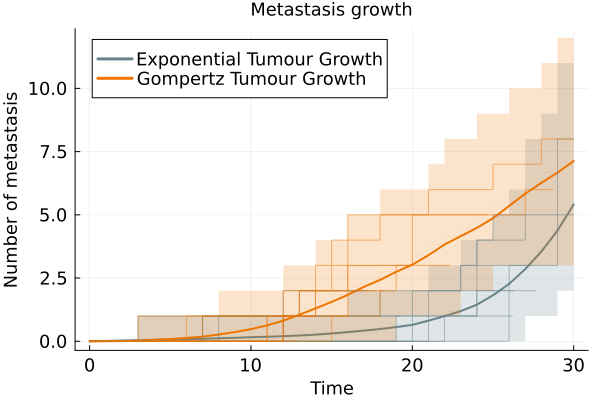

In [5]:
timepoints = 0.0:1.0:30.0
plt = plot()

prop_metastasis_mean = []
prop_metastasis_low_ci = []
prop_metastasis_high_ci = []
gomp_metastasis_mean = []
gomp_metastasis_low_ci = []
gomp_metastasis_high_ci = []
dead = []
    for t in unique(timepoints)
        push!(prop_metastasis_mean, mean(proportional_data[proportional_data.time .== t, :metastasis]))
        push!(prop_metastasis_low_ci, quantile(proportional_data[proportional_data.time .== t, :metastasis], 0.05))
        push!(prop_metastasis_high_ci, quantile(proportional_data[proportional_data.time .== t, :metastasis], 0.95))
        push!(gomp_metastasis_mean, mean(gompertz_data[gompertz_data.time .== t, :metastasis]))
        push!(gomp_metastasis_low_ci, quantile(gompertz_data[gompertz_data.time .== t, :metastasis], 0.05))
        push!(gomp_metastasis_high_ci, quantile(gompertz_data[gompertz_data.time .== t, :metastasis], 0.95))
    end

plot!(plt, timepoints, 
    prop_metastasis_mean, 
    label="Exponential Tumour Growth", 
    color=:lightblue4,
    linewidth=2)
plot!(plt, timepoints, 
prop_metastasis_mean, 
ribbon=((prop_metastasis_mean-round.(prop_metastasis_low_ci)),round.(prop_metastasis_high_ci)-prop_metastasis_mean,), 
fillalpha=0.2,
linewidth = 0,
label = "",
linetype=:steppre,
color=:lightblue4)

plot!(plt, timepoints, 
    gomp_metastasis_mean, 
    label="Gompertz Tumour Growth", 
    linewidth=2,
    color=:darkorange2)
plot!(plt, timepoints, 
    gomp_metastasis_mean, 
    ribbon=((gomp_metastasis_mean-round.(gomp_metastasis_low_ci)),round.(gomp_metastasis_high_ci)-gomp_metastasis_mean), 
    fillalpha=0.2,
    linewidth = 0,
    color=:darkorange2,
    label = "",
    linetype=:steppre)
# add some single metastasis trajectories
for i in sample(1:npat, 10, replace=false)
    plot!(plt, proportional_data[proportional_data.patient_id .== i, :time], 
        proportional_data[proportional_data.patient_id .== i, :metastasis], 
        color=:lightblue4, 
        linetype=:steppre,
        alpha=0.5,
        label="")
end
for i in sample(1:npat, 10, replace=false)
    plot!(plt, gompertz_data[gompertz_data.patient_id .== i, :time], 
        gompertz_data[gompertz_data.patient_id .== i, :metastasis], 
        color=:darkorange2, 
        linetype=:steppre,
        alpha=0.5,
        label="")
end

plot!(tickfontsize=12, legendfontsize=12, guidefontsize=12, titlefontsize=12, legend=:topleft)
plot!(plt, title="Metastasis growth", xlabel="Time", ylabel="Number of metastasis")

In [6]:
savefig(plt, "figures/ode_paper/metastasis_process_comparison_tumour_growth.pdf")

"/Users/vincentwieland/PhD/Projects/method_project/second_model/figures/ode_paper/metastasis_process_comparison_tumour_growth.pdf"

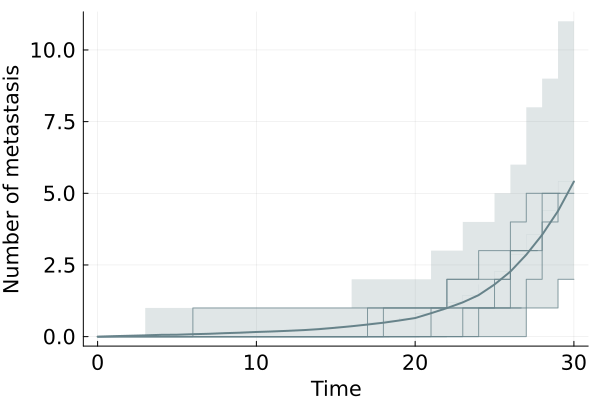

In [144]:
plt = plot()

plot!(plt, timepoints, 
    prop_metastasis_mean, 
    label="Exponential Tumour Growth", 
    color=:lightblue4,
    linewidth=2)
plot!(plt, timepoints, 
prop_metastasis_mean, 
ribbon=((prop_metastasis_mean-round.(prop_metastasis_low_ci)),round.(prop_metastasis_high_ci)-prop_metastasis_mean,), 
fillalpha=0.2,
linewidth = 0,
label = "",
linetype=:steppre,
color=:lightblue4)


# add some single metastasis trajectories
for i in sample(1:npat, 10, replace=false)
    plot!(plt, proportional_data[proportional_data.patient_id .== i, :time], 
        proportional_data[proportional_data.patient_id .== i, :metastasis], 
        color=:lightblue4, 
        linetype=:steppre,
        alpha=0.8,
        label="")
end



plot!(plt, 
    title="", 
    xlabel="Time", 
    ylabel="Number of metastasis", 
    legend=false,
    tickfontsize=14,
    legendfontsize=14,
    guidefontsize=14,)

In [145]:
savefig(plt, "figures/ode_paper/metastasis_process_exponential_tumour_growth.pdf")

"/Users/vincentwieland/PhD/Projects/method_project/second_model/figures/ode_paper/metastasis_process_exponential_tumour_growth.pdf"

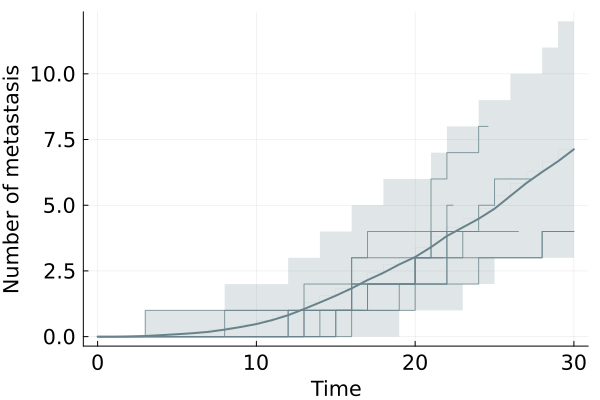

In [154]:
plt = plot()

plot!(plt, timepoints, 
    gomp_metastasis_mean, 
    label="Gompertz Tumour Growth", 
    linewidth=2,
    color=:lightblue4)
plot!(plt, timepoints, 
    gomp_metastasis_mean, 
    ribbon=((gomp_metastasis_mean-round.(gomp_metastasis_low_ci)),round.(gomp_metastasis_high_ci)-gomp_metastasis_mean), 
    fillalpha=0.2,
    linewidth = 0,
    color=:lightblue4,
    label = "",
    linetype=:steppre)

for i in sample(1:npat, 10, replace=false)
    plot!(plt, gompertz_data[gompertz_data.patient_id .== i, :time], 
        gompertz_data[gompertz_data.patient_id .== i, :metastasis], 
        color=:lightblue4, 
        linetype=:steppre,
        alpha=0.8,
        label="")
end


plot!(plt, 
    title="", 
    xlabel="Time", 
    ylabel="Number of metastasis", 
    legend=false,
    tickfontsize=14,
    legendfontsize=14,
    guidefontsize=14,)

In [155]:
savefig(plt, "figures/ode_paper/metastasis_process_gompertz_tumour_growth.pdf")

"/Users/vincentwieland/PhD/Projects/method_project/second_model/figures/ode_paper/metastasis_process_gompertz_tumour_growth.pdf"

## Comparison of KM curves between growth models

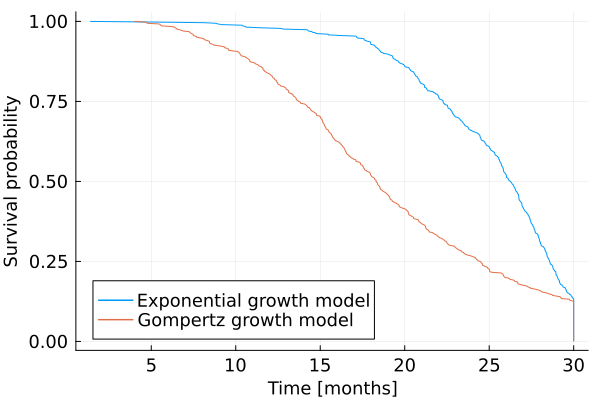

In [10]:
npat = 500
proportional_death_lines = Vector{Any}(undef, npat)
gompertz_death_lines = Vector{Any}(undef, npat)

for i in 1:npat
    try
        proportional_death_index = findfirst(proportional_data[proportional_data.patient_id.== i, :].death .== 1)
        proportional_death_lines[i] = proportional_data[proportional_data.patient_id .== i, :][proportional_death_index, :]
        gompertz_death_index = findfirst(gompertz_data[gompertz_data.patient_id .== i, :].death .== 1)
        gompertz_death_lines[i] = gompertz_data[gompertz_data.patient_id .== i, :][gompertz_death_index, :]
    catch e
        proportional_death_lines[i] = proportional_data[proportional_data.patient_id .== i, :][end, :]
        gompertz_death_lines[i] = gompertz_data[gompertz_data.patient_id .== i, :][end, :]
    end
end


proportional_survivals = Vector{Any}(undef, npat)
gompertz_survivals = Vector{Any}(undef, npat)

for i in 1:npat
    proportional_survivals[i] = proportional_death_lines[i].time[1]
    gompertz_survivals[i] = gompertz_death_lines[i].time[1]
end

# Plot Kaplan-Meier curve for survivals

# sort by survival
proportional_survivals = sort(proportional_survivals)
gompertz_survivals = sort(gompertz_survivals)

# get survival probabilities
proportional_survival_probs = zeros(npat) 
gompertz_survival_probs = zeros(npat) 

for i in 1:npat
    proportional_survival_probs[i] = (npat - i + 1) / npat
    gompertz_survival_probs[i] = (npat - i + 1) / npat
end

# plot
plot(proportional_survivals, proportional_survival_probs, xlabel="Time", ylabel="Survival probability", label="Exponential growth model")
plot!(gompertz_survivals, gompertz_survival_probs, xlabel="Time [months]", ylabel="Survival probability", label="Gompertz growth model")
plot!(tickfontsize=12, legendfontsize=12, guidefontsize=12, titlefontsize=12, legend=:bottomleft)
# savefig("figures/ode_paper/KM_curves_tumour_growth_comparison.pdf")


## Kaplan Meier curve

In [9]:
# Get death lines per patient from patient_data

npat = 500
load_path = joinpath(dir, "data/$(npat)_mnr_patients_noisy.jld2")
mnr_data= load(load_path, "mnr_df");
death_lines = Vector{Any}(undef, npat)
nalive = 0

for i in 1:npat
    try
        death_index = findfirst(mnr_data[mnr_data.patient_id .== i, :].death .== 1)

        death_lines[i] = mnr_data[mnr_data.patient_id .== i, :][death_index, :]
    catch e
        nalive += 1
        death_lines[i] = mnr_data[mnr_data.patient_id .== i, :][end, :]
    end
end

# Plot histogram of metastasis numbers per line in death lines

metastasis_numbers = zeros(npat)
for i in 1:npat
    metastasis_numbers[i] = death_lines[i].metastasis[1]
end

survivals = Vector{Any}(undef, npat)

for i in 1:npat
    survivals[i] = death_lines[i].time[1]
end

# Plot Kaplan-Meier curve for survivals

# sort by survival
sorted_survivals = sort(survivals)

# get survival probabilities
survival_probs = zeros(npat) 

for i in 1:npat
    survival_probs[i] = (npat - i + 1) / npat
end

# plot
println("$nalive patients survived.")
plt = plot(sorted_survivals, survival_probs, linewidth=2)
plot!(plt, 
           title="", 
           titlefontsize=14,
           xlabel="Time", 
           ylabel="Survival probability",
           xguidefontsize=14,
           yguidefontsize=14, 
           tickfontsize = 14,
           legend=false, 
           size=(600,400),
           left_margin=6mm,
           bottom_margin=6mm,)
plot!(plt, xlimits=(0,29))
plot!(plt, xticks=false)

# savefig(plt, joinpath(dir, "figures/kaplan_meier_curve_example_no_title.pdf"))

83 patients survived.


"/home/vincent/PhD/Projects/Combined_Stochastic_Model1/figures/kaplan_meier_curve_example_no_title.pdf"